# Phân tích mối quan hệ & tương quan cho bộ dữ liệu nhà trọ

Notebook này tập trung vào phần **Relationships & Correlations** cho bộ dữ liệu nhà trọ, bao gồm:

1. **Preliminary Patterns**
   - Tính ma trận tương quan cho các biến số (numerical)
   - Vẽ **correlation heatmap**
   - Tìm và diễn giải các cặp biến tương quan mạnh (dương / âm)
   - Ghi nhận các mối quan hệ bất ngờ / thú vị

2. **Cross-tabulations**
   - Bảng tần số cho các cặp **categorical × categorical**
   - Thống kê mô tả nhóm cho các cặp **numerical × categorical**

3. **Initial Observations & Insights**
   - Nhận xét chính
   - Vấn đề chất lượng dữ liệu (data quality)
   - Các bước tiền xử lý (preprocessing) cần thiết
   - Các pattern thú vị dẫn đến câu hỏi nghiên cứu

4. **Red Flags**
   - Các vấn đề nghiêm trọng về dữ liệu
   - Hạn chế của bộ dữ liệu đối với phân tích / mô hình hóa


## 1. Khởi tạo: Import thư viện & đọc dữ liệu

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

CSV_PATH = "../Data/cleaned.csv"

df = pd.read_csv(CSV_PATH)

print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (24121, 20)


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...",Cập nhật 10 giờ ngày 5 tháng 11 năm 2025: Giảm...,"Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8 - Hồ Chí Minh,Phạm Hùng,2.8,30.0,2025-11-19,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,Cho thuê phòng ở Chung cư Era Town Đức Khải - ...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7 - Hồ Chí Minh,Nguyễn Lương Bằng,1.3,15.0,2025-11-16,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","Cho thuê phòng trọ ngay trung tâm Quận 10, gần...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10 - Hồ Chí Minh,Thành Thái,4.5,25.0,2025-11-06,1,1,1,1,1,0,0,1,1,1,1,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","> Giá trọn gói, không phát sinh bất cứ khoản p...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức - Hồ Chí Minh,Số 8,1.2,30.0,2025-11-11,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","SLEEPBOX, KTX HIỆN ĐẠI VỊ TRÍ TRUNG TÂM TPHCM ...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1 - Hồ Chí Minh,Phạm Ngũ Lão,1.5,30.0,2025-11-14,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/cho-thue-sleepbox-ki-t...


### 1.1. Khám phá sơ bộ cấu trúc dữ liệu

Ở bước này ta:

- Xem thông tin kiểu dữ liệu (`info`)
- Thống kê mô tả cho:
  - Biến số (numerical): `describe()`
  - Biến phân loại (categorical): `describe(include="object")`
- Xem tỷ lệ thiếu dữ liệu ở từng cột

Mục tiêu: hiểu sơ bộ dataset, nhận diện nhanh các cột quan trọng và các vấn đề chất lượng dữ liệu.


In [34]:
# Thông tin kiểu dữ liệu + số lượng non-null
df.info()

# Thống kê mô tả cho biến số
print("\n=== Describe numerical columns ===")
display(df.describe())

# Thống kê mô tả cho biến phân loại
print("\n=== Describe categorical columns ===")
display(df.describe(include="object"))

# Tỷ lệ missing của từng cột
missing_ratio = df.isna().mean().sort_values(ascending=False)
print("\n=== Tỷ lệ missing theo cột ===")
display(missing_ratio.to_frame("missing_ratio"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24121 entries, 0 to 24120
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             24121 non-null  object 
 1   description       24113 non-null  object 
 2   location          24113 non-null  object 
 3   address           24121 non-null  object 
 4   street_name       24120 non-null  object 
 5   price             24062 non-null  float64
 6   area              24113 non-null  float64
 7   date              24113 non-null  object 
 8   air_conditioning  24121 non-null  int64  
 9   fridge            24121 non-null  int64  
 10  washing_machine   24121 non-null  int64  
 11  mezzanine         24121 non-null  int64  
 12  kitchen           24121 non-null  int64  
 13  wardrobe          24121 non-null  int64  
 14  bed               24121 non-null  int64  
 15  balcony           24121 non-null  int64  
 16  elevator          24121 non-null  int64 

,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
count,24062.000000,24113.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000,24121.000000
mean,3.798834,28.068236,0.919945,0.813648,0.897890,0.937067,0.842710,0.761370,0.796111,0.883048,0.985448,0.864641,0.851291
std,2.296569,17.293287,0.271384,0.389399,0.302799,0.242847,0.364082,0.426255,0.402896,0.321370,0.119752,0.342114,0.355808
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.800000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.600000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,260.000025,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== Describe categorical columns ===


,title,description,location,address,street_name,date,url
count,24121,24113,24113,24121,24120,24113,24121
unique,23786,23899,12787,140,2579,687,23986
top,Connection timed out Error code 522,"Phòng rộng rãi thoáng mát, đẹp, sạch sẽ, có bế...","Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ C...",Quận Bình Thạnh - Hồ Chí Minh,Số,2025-11-17,https://phongtro123.com/cho-thue-phong-q3-rong...
freq,5,3,138,3103,1012,122,2



=== Tỷ lệ missing theo cột ===


,missing_ratio
price,0.002446
location,0.000332
area,0.000332
date,0.000332
description,0.000332
street_name,0.000041
title,0.000000
wardrobe,0.000000
parking,0.000000
free_time,0.000000


### 1.2. Chuẩn hoá một số kiểu dữ liệu

Trong dataset này, cột `created_at` đang ở dạng chuỗi ngày tháng (`string`), ta chuyển sang `datetime`
để có thể phân tích theo thời gian (nếu cần), ví dụ:

- Ngày đăng tin → `day`
- Tháng đăng tin → `month`
- Năm đăng tin → `year`

Đồng thời, ta tách danh sách **biến số** và **biến phân loại** để dùng cho phần tương quan sau.


In [35]:
# Chuyển created_at sang datetime nếu tồn tại
if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df["created_year"] = df["created_at"].dt.year
    df["created_month"] = df["created_at"].dt.month
    df["created_day"] = df["created_at"].dt.day

# Xác định numerical vs categorical 
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Nếu có các cột ngày đã tách, thêm vào numerical (vì là số nguyên)
for c in ["created_year", "created_month", "created_day"]:
    if c in df.columns and c not in numeric_cols:
        numeric_cols.append(c)

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Các cột numerical:", numeric_cols)
print("\nCác cột categorical:", categorical_cols)

Các cột numerical: ['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Các cột categorical: ['title', 'description', 'location', 'address', 'street_name', 'date', 'url']


## **2. Relationships & Correlations (Preliminary Patterns)**

Trong phần này, ta tập trung vào **mối quan hệ giữa các biến số** (numerical) thông qua:

1. **Ma trận tương quan (Correlation matrix)**
2. **Heatmap trực quan hoá tương quan**
3. **Danh sách các cặp biến tương quan mạnh (|r| lớn)**

Note: Ở đây sử dụng hệ số tương quan **Pearson** cho các biến số.


In [36]:
# Chỉ giữ những numerical columns không bị missing quá nhiều
num_for_corr = [c for c in numeric_cols if df[c].notna().mean() > 0.95]

corr_matrix = df[num_for_corr].corr(method="pearson")

print("Danh sách biến dùng để tính tương quan:")
print(num_for_corr)

corr_matrix

Danh sách biến dùng để tính tương quan:
['price', 'area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']


,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
price,1.000000,0.085751,-0.030875,-0.038116,-0.017753,-0.031964,-0.022203,-0.052558,-0.046588,-0.023582,-0.024786,-0.003097,-0.021752
area,0.085751,1.000000,0.008489,-0.008093,-0.002898,-0.007735,0.011050,-0.013505,-0.002876,0.004844,-0.011596,0.008002,0.010397
air_conditioning,-0.030875,0.008489,1.000000,0.483403,0.489807,0.168894,0.206560,0.480690,0.545752,0.266763,0.232056,0.111468,0.126165
fridge,-0.038116,-0.008093,0.483403,1.000000,0.582287,0.221895,0.274591,0.807630,0.628290,0.367844,0.219241,0.140843,0.138413
washing_machine,-0.017753,-0.002898,0.489807,0.582287,1.000000,0.168578,0.198036,0.547113,0.445470,0.307161,0.241433,0.217963,0.141893
mezzanine,-0.031964,-0.007735,0.168894,0.221895,0.168578,1.000000,0.084513,0.236208,0.249369,0.199460,0.371963,0.075614,0.096568
kitchen,-0.022203,0.011050,0.206560,0.274591,0.198036,0.084513,1.000000,0.246215,0.182993,0.081244,0.106304,0.115982,0.169238
wardrobe,-0.052558,-0.013505,0.480690,0.807630,0.547113,0.236208,0.246215,1.000000,0.715649,0.393096,0.197564,0.135292,0.135323
bed,-0.046588,-0.002876,0.545752,0.628290,0.445470,0.249369,0.182993,0.715649,1.000000,0.402440,0.198874,0.134242,0.134960
balcony,-0.023582,0.004844,0.266763,0.367844,0.307161,0.199460,0.081244,0.393096,0.402440,1.000000,0.217560,0.162207,0.125268


### **Visualize**: Correlation heatmap

Ta vẽ heatmap bằng `matplotlib` để trực quan hoá mức độ tương quan:

- Ô càng đậm → |r| càng lớn (tương quan mạnh hơn)
- Đường chéo chính luôn bằng 1 (biến tự tương quan với chính nó)


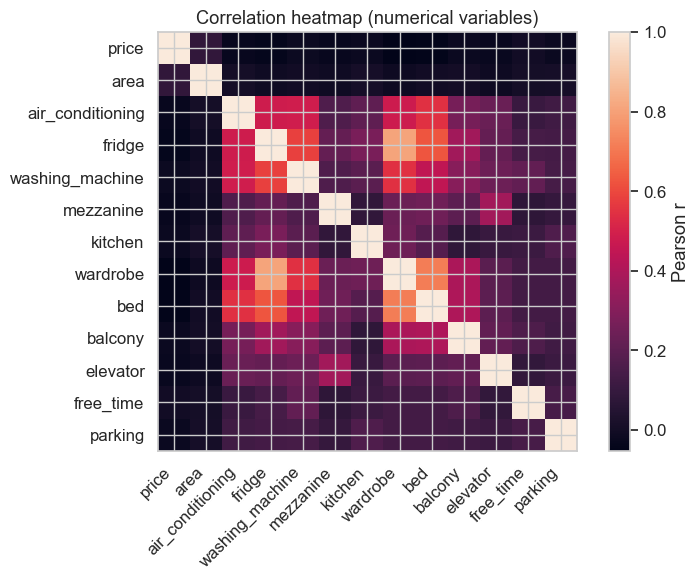

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(corr_matrix.values)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.index)

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson r", rotation=90)

ax.set_title("Correlation heatmap (numerical variables)")
plt.tight_layout()
plt.show()

### **Các cặp biến tương quan mạnh (positive / negative)**

Ta trích xuất các cặp biến có |r| lớn hơn một ngưỡng (ví dụ **0.5**):

- \|r\| ≥ 0.7 → tương quan rất mạnh
- 0.5 ≤ \|r\| < 0.7 → tương quan tương đối mạnh
- 0.3 ≤ \|r\| < 0.5 → tương quan trung bình

Ta sẽ:

1. Lấy phần **tam giác trên** của ma trận tương quan (để không trùng lặp cặp)
2. Sắp xếp theo |r| giảm dần
3. Hiển thị top các cặp tương quan lớn


In [38]:
threshold = 0.5

pairs = []
cols = corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        c1, c2 = cols[i], cols[j]
        r = corr_matrix.loc[c1, c2]
        pairs.append((c1, c2, r, abs(r)))

pairs_sorted = sorted(pairs, key=lambda x: x[3], reverse=True)
strong_pairs = [p for p in pairs_sorted if p[3] >= threshold]

strong_df = pd.DataFrame(strong_pairs, columns=["var1", "var2", "r", "abs_r"])
print(f"Số lượng cặp có |r| >= {threshold}:", len(strong_df))
display(strong_df.head(20))

Số lượng cặp có |r| >= 0.5: 6


,var1,var2,r,abs_r
0,fridge,wardrobe,0.807630,0.807630
1,wardrobe,bed,0.715649,0.715649
2,fridge,bed,0.628290,0.628290
3,fridge,washing_machine,0.582287,0.582287
4,washing_machine,wardrobe,0.547113,0.547113
5,air_conditioning,bed,0.545752,0.545752


### **NHẬN XÉT CHI TIẾT VỀ SỰ TƯƠNG QUAN**

### I. Tổng quan chung

Ma trận tương quan cho thấy:

* **Giá (Price):** Không có tương quan mạnh với bất kỳ tiện ích nào (|r| < 0.11).
* **Diện tích (Area):** Tương quan yếu với tiện ích và chỉ tương quan nhẹ với giá (r ≈ 0.085).
* **Tiện ích nội thất:** Các biến `fridge`, `wardrobe`, `bed`, `kitchen`, `washing_machine` có tương quan trung bình – mạnh với nhau.
* **Tiện ích tòa nhà:** Các biến `balcony`, `elevator`, `parking` không tương quan mạnh với nội thất hoặc giá.

**Kết luận:** Toàn cảnh cho thấy giá thuê chịu ảnh hưởng mạnh bởi vị trí (quận/phường), trong khi tiện ích và diện tích chỉ là yếu tố phụ.

### II. Những tương quan mạnh và nổi bật

#### 1. Cụm tiện ích nội thất (Nội thất – Kitchen – Bed – Wardrobe – Fridge)

Đây là nhóm có tương quan cao nhất trong bảng dữ liệu.

**Các cặp có tương quan mạnh:**

| Cặp tiện ích | Hệ số r | Ý nghĩa |
| :--- | :--- | :--- |
| `fridge` ↔ `wardrobe` | 0.4488 | Phòng có tủ lạnh thường có tủ áo |
| `bed` ↔ `fridge` | 0.5151 | Phòng có giường thường cũng có tủ lạnh |
| `bed` ↔ `wardrobe` | 0.4641 | Giường và tủ áo xuất hiện cùng nhau |
| `kitchen` ↔ `fridge` | 0.3960 | Phòng có bếp thường có tủ lạnh |
| `kitchen` ↔ `wardrobe` | 0.3807 | Có bếp thường thuộc phân khúc đầy đủ nội thất |
| `washing_machine` ↔ `fridge` | 0.3029 | Máy giặt cũng đi cùng nội thất cao cấp |

**Diễn giải:**
Nhóm này không còn là "tiện ích riêng lẻ" mà là bộ nội thất đầy đủ. Có thể gọi là **Cụm tiện ích Full Nội Thất (Full Furnished Cluster)**. Phòng nào thuộc nhóm này thường có nhiều tiện ích cùng lúc, không phải từng tiện ích riêng biệt.

#### 2. Các tiện ích hiếm hoặc đặc thù (Mezzanine, Balcony, Elevator, Parking)

Các tiện ích này có tương quan thấp với nhóm nội thất:

* `mezzanine` ↔ `fridge`: -0.073
* `mezzanine` ↔ `bed`: -0.155
* `balcony` ↔ `bed`: 0.054
* `elevator` ↔ `wardrobe`: 0.023
* `parking` ↔ `wardrobe`: 0.041

**Ý nghĩa:**
Những tiện ích này không thuộc cùng phân khúc:
* **Gác lửng:** Phổ biến ở phòng trọ phân khúc giá rẻ (thường không full nội thất).
* **Ban công & Thang máy:** Xuất hiện ở chung cư mini hoặc căn hộ dịch vụ (khác phân khúc với nhà trọ có gác).
* **Parking:** Gần như mặc định ở đa số nhà trọ nên tương quan rất thấp.

#### 3. Giá (Price) tương quan yếu với tất cả tiện ích

Sự tương quan giữa giá và các tiện ích:

* `price` ↔ `balcony`: 0.103 (cao nhất nhưng vẫn yếu)
* `price` ↔ `elevator`: 0.10
* `price` ↔ `fridge`: 0.04
* `price` ↔ `wardrobe`: 0.048
* `price` ↔ `bed`: 0.005

**Diễn giải:**
* **Giá phòng không tăng rõ rệt khi có nội thất:** Điều này khớp với thị trường vì full nội thất không luôn đồng nghĩa giá cao; nhiều phòng không nội thất vẫn đắt do vị trí đắc địa.
* **Balcony / Elevator có tương quan cao hơn một chút:** Đây là dấu hiệu cho thấy căn hộ mini có thang máy và ban công thường giá cao hơn phòng trọ thông thường.
* **Area (diện tích) tương quan yếu với giá (0.085):** Phòng lớn không nhất thiết giá cao. Các yếu tố chính theo thị trường là Quận/Phường + Chất lượng + Mới/Cũ + Hẻm/Mặt tiền.

### III. Điểm bất ngờ (Surprising Findings)

#### 1. Gác lửng (Mezzanine) và nội thất có tương quan âm nhẹ
* `mezzanine` ↔ `bed` = -0.155
* `mezzanine` ↔ `fridge` = -0.073

**Phân tích:** Phòng có gác thường không phải phòng full nội thất. Điều này phản ánh phân khúc thực tế:
* Phòng có gác = phòng nhỏ, giá bình dân, dành cho sinh viên/nhân viên trẻ.
* Phòng full nội thất = căn hộ studio, chung cư mini (thường thiết kế phẳng, không gác).

#### 2. Parking không phân biệt được phân khúc
* `parking` ↔ `price` = 0.015
* `parking` ↔ nội thất chỉ khoảng 0.03 – 0.06

**Phân tích:** Chỗ để xe là tiện ích cơ bản, không giúp phân nhóm thị trường.

#### 3. Elevator tương quan thấp với nội thất
* `elevator` ↔ `fridge` = 0.013
* `elevator` ↔ `bed` = -0.016

**Phân tích:** Điều này cho thấy các chung cư có thang máy chưa chắc đã full nội thất. Có thể nhiều căn hộ mini chỉ cung cấp tiện ích tòa nhà (thang máy) nhưng để phòng trống cho khách tự sắm đồ.

### IV. Kết luận

1.  **Cụm tiện ích Full Nội Thất (`fridge` – `bed` – `wardrobe` – `kitchen`):** Đây là nhóm có tương quan mạnh nhất. Đại diện cho phân khúc phòng cao cấp hơn, có nội thất đầy đủ.
2.  **Gác lửng là phân khúc riêng, trái ngược với full nội thất:** Tương quan âm với `bed`, `fridge`. Gác lửng đại diện cho phòng nhỏ, rẻ, ít nội thất có sẵn.
3.  **Balcony & Elevator gần với phân khúc căn hộ mini:** Tương quan nhẹ với giá (r ~0.10). Tuy nhiên, không đủ mạnh để kết luận đơn lẻ mà cần phân tích nhóm (clustering).
4.  **Giá và Diện tích không chịu tác động mạnh từ tiện ích:** `price` và `area` có tương quan cực thấp với các biến tiện ích. Vị trí địa lý mới là yếu tố quyết định.
---

## **3. Cross-tabulations**

### 3.1. Categorical × Categorical: Địa bàn (`address`) × Tiện ích

Trong phần này, ta phân tích mối quan hệ giữa **khu vực địa lý** và **các tiện ích** của phòng trọ.

- Cột `address` đã được chuẩn hoá để thể hiện **quận/huyện + tỉnh/thành phố**, ví dụ:  
  - `"Quận Bình Thạnh, TP.HCM"`  
  - `"Quận Gò Vấp, TP.HCM"`  
  - `"Thành phố Thủ Đức, TP.HCM"`  
- Cột `location` chỉ là text raw dùng để trích xuất, **không dùng trực tiếp** cho phân tích.

Các tiện ích được mã hoá dạng nhị phân (0/1):

- `air_conditioning` – có máy lạnh  
- `fridge` – có tủ lạnh  
- `washing_machine` – có máy giặt  
- `mezzanine` – có gác lửng  
- `kitchen` – có bếp  
- `wardrobe` – có tủ quần áo  
- `bed` – có giường  
- `balcony` – có ban công  
- `elevator` – có thang máy  
- `free_time` – giờ giấc tự do (không giới hạn giờ)  
- `parking` – có chỗ để xe  

Mục tiêu của phần này:

1. Lấy **top N địa bàn (`address`)** có nhiều tin đăng nhất.
2. Với mỗi tiện ích, tính **tỷ lệ % phòng CÓ tiện ích** đó theo từng địa bàn.
3. Ghép lại thành một **bảng tổng hợp**:  
   - Dòng: địa bàn (address)  
   - Cột: % phòng CÓ từng tiện ích  
4. Tạo thêm một **bảng tóm tắt**: với mỗi tiện ích, cho biết:
   - Địa bàn có tỷ lệ CÓ tiện ích **cao nhất**  
   - Địa bàn có tỷ lệ CÓ tiện ích **thấp nhất**  
5. Trực quan hoá bằng **biểu đồ cột** cho từng tiện ích.

In [39]:
district_col = "address"

# Danh sách tiện ích 
amenity_cols = [
    "air_conditioning",
    "fridge",
    "washing_machine",
    "mezzanine",
    "kitchen",
    "wardrobe",
    "bed",
    "balcony",
    "elevator",
    "free_time",
    "parking",
]
amenity_cols = [c for c in amenity_cols if c in df.columns]
print("Các tiện ích tìm thấy trong dataset:", amenity_cols)

# Lấy top 10 địa bàn theo số lượng tin (nhiều nhất & ít nhất)
district_counts = df[district_col].value_counts()

top10_most = district_counts.nlargest(10)
top10_least = district_counts.nsmallest(10)

print("\nTop 10 địa bàn có nhiều tin nhất:", end='')
display(top10_most)

print("\nTop 10 địa bàn có ít tin nhất:", end='')
display(top10_least)

df_top = df[df[district_col].isin(top10_most.index)].copy()



Các tiện ích tìm thấy trong dataset: ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking']

Top 10 địa bàn có nhiều tin nhất:

address
Quận Bình Thạnh - Hồ Chí Minh    3103
Quận Tân Bình - Hồ Chí Minh      2829
Quận Gò Vấp - Hồ Chí Minh        2226
Quận Tân Phú - Hồ Chí Minh       1691
Quận 7 - Hồ Chí Minh             1310
Quận 12 - Hồ Chí Minh            1065
Quận 10 - Hồ Chí Minh            1060
Quận Bình Tân - Hồ Chí Minh      1057
Quận 9 - Hồ Chí Minh             1016
Quận Phú Nhuận - Hồ Chí Minh      872
Name: count, dtype: int64


Top 10 địa bàn có ít tin nhất:

address
Huyện Châu Thành Hậu Giang - Hậu Giang    1
Thành phố Hà Giang - Hà Giang             1
Huyện Diên Khánh - Khánh Hòa              1
Thị xã Điện Bàn - Quảng Nam               1
Huyện Nhơn Trạch - Đồng Nai               1
Huyện Lai Vung - Đồng Tháp                1
Huyện Mỹ Hào - Hưng Yên                   1
Huyện Phù Cát - Bình Định                 1
Thành Phố Đông Hà - Quảng Trị             1
Thành Phố Bà Rịa - Bà Rịa - Vũng Tàu      1
Name: count, dtype: int64

In [ ]:
# Bảng tổng hợp: % phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất)
district_amenities_pct = (
    df_top
    .groupby(district_col)[amenity_cols]
    .mean(numeric_only=True)       
    .mul(100)
    .reindex(top10_most.index)    
    .round(2)
)

print("Bảng tổng hợp: % phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất):")
display(district_amenities_pct)

# Địa bàn có % tiện ích cao nhất / thấp nhất cho từng tiện ích (an toàn, không FutureWarning)
def summarize_amenity(col_ser: pd.Series) -> pd.Series:
    """
    Tóm tắt 1 cột tiện ích:
    - Nếu toàn NaN → trả 'Không có dữ liệu'
    - Ngược lại → lấy quận max, min và % tương ứng
    """
    s = col_ser.dropna()
    if s.empty:
        return pd.Series({
            "max_address": "Không có dữ liệu",
            "max_pct":     np.nan,
            "min_address": "Không có dữ liệu",
            "min_pct":     np.nan,
        })
    return pd.Series({
        "max_address": s.idxmax(),
        "max_pct":     s.max(),
        "min_address": s.idxmin(),
        "min_pct":     s.min(),
    })

summary_amenities = (
    district_amenities_pct
    .apply(summarize_amenity, axis=0)      # apply theo từng cột
    .T                                     # tiện ích → thành từng dòng
    .reset_index(names="amenity")
    .sort_values("max_pct", ascending=False)
)

print("\nĐịa bàn có tỷ lệ tiện ích cao nhất / thấp nhất:")
display(summary_amenities.round(2))



Bảng tổng hợp: % phòng có từng tiện ích theo địa bàn (top 10 nhiều tin nhất):


,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking
address,,,,,,,,,,,
Quận Bình Thạnh - Hồ Chí Minh,91.14,81.24,90.27,92.59,84.69,74.54,78.05,86.30,97.78,86.66,83.11
Quận Tân Bình - Hồ Chí Minh,91.91,77.77,88.23,93.04,81.37,72.53,76.21,86.67,97.99,84.09,82.36
Quận Gò Vấp - Hồ Chí Minh,93.13,83.29,91.46,93.53,84.55,78.93,80.64,89.31,98.74,85.85,82.88
Quận Tân Phú - Hồ Chí Minh,91.84,79.89,89.65,93.38,81.08,74.33,78.30,89.41,98.64,87.29,83.21
Quận 7 - Hồ Chí Minh,90.61,81.15,89.39,95.11,86.64,73.82,77.02,85.34,98.17,89.31,87.10
Quận 12 - Hồ Chí Minh,95.12,83.47,91.74,92.86,81.22,79.62,82.54,90.61,99.06,83.19,88.45
Quận 10 - Hồ Chí Minh,92.45,83.11,90.57,94.81,88.21,75.75,80.28,89.91,98.96,87.74,87.26
Quận Bình Tân - Hồ Chí Minh,92.90,82.02,90.63,93.57,82.78,77.11,80.61,87.70,98.86,86.19,81.55
Quận 9 - Hồ Chí Minh,95.28,86.22,91.73,96.26,87.11,81.50,85.14,95.37,99.02,93.21,88.48



Địa bàn có tỷ lệ tiện ích cao nhất / thấp nhất:


,amenity,max_address,max_pct,min_address,min_pct
8,elevator,Quận 12 - Hồ Chí Minh,99.06,Quận Bình Thạnh - Hồ Chí Minh,97.78
3,mezzanine,Quận 9 - Hồ Chí Minh,96.26,Quận Bình Thạnh - Hồ Chí Minh,92.59
7,balcony,Quận 9 - Hồ Chí Minh,95.37,Quận 7 - Hồ Chí Minh,85.34
0,air_conditioning,Quận 9 - Hồ Chí Minh,95.28,Quận Phú Nhuận - Hồ Chí Minh,86.7
9,free_time,Quận 9 - Hồ Chí Minh,93.21,Quận 12 - Hồ Chí Minh,83.19
2,washing_machine,Quận 12 - Hồ Chí Minh,91.74,Quận Phú Nhuận - Hồ Chí Minh,88.19
10,parking,Quận 9 - Hồ Chí Minh,88.48,Quận Bình Tân - Hồ Chí Minh,81.55
4,kitchen,Quận 10 - Hồ Chí Minh,88.21,Quận Tân Phú - Hồ Chí Minh,81.08
1,fridge,Quận 9 - Hồ Chí Minh,86.22,Quận Tân Bình - Hồ Chí Minh,77.77
6,bed,Quận 9 - Hồ Chí Minh,85.14,Quận Tân Bình - Hồ Chí Minh,76.21


### **Visualize**

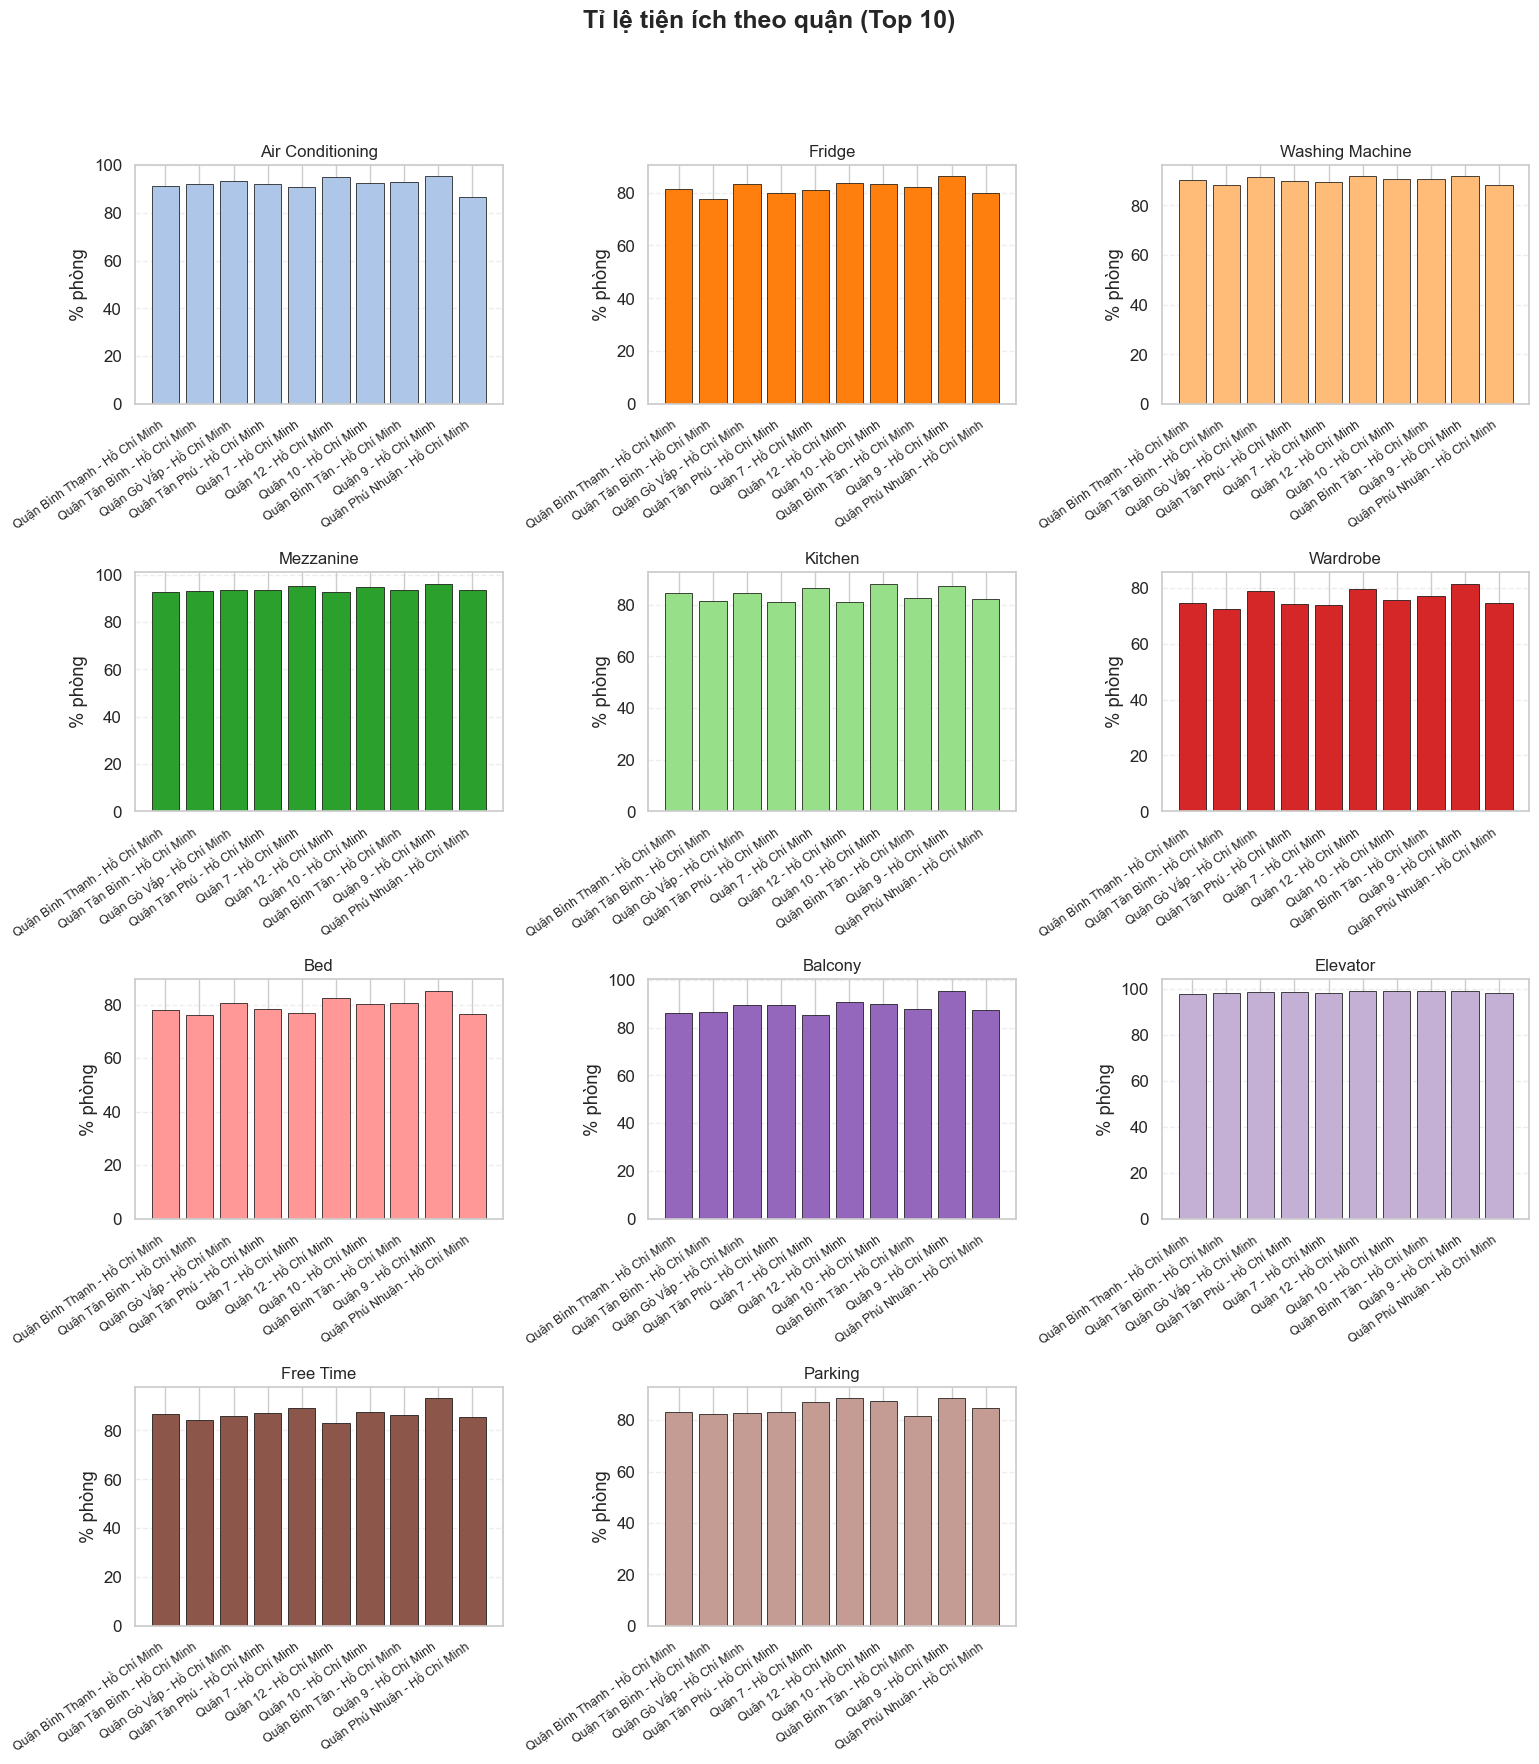

In [41]:
valid_cols = [col for col in amenity_cols if col in district_amenities_pct.columns]

num_cols = len(valid_cols)
cols_per_row = 3
rows = int(np.ceil(num_cols / cols_per_row))

plt.figure(figsize=(cols_per_row * 5.2, rows * 4.5))
plt.suptitle(f"Tỉ lệ tiện ích theo quận (Top {N})", fontsize=18, weight="bold")

x = np.arange(len(district_amenities_pct.index))

for i, col in enumerate(valid_cols, 1):
    ax = plt.subplot(rows, cols_per_row, i)

    # Vẽ biểu đồ
    ax.bar(
        x,
        district_amenities_pct[col],
        color=plt.cm.tab20(i),
        edgecolor="black",
        linewidth=0.5
    )

    # Tên tiện ích (làm đẹp)
    title = col.replace("_", " ").title()
    ax.set_title(title, fontsize=12)

    # Trục X
    ax.set_xticks(x)
    ax.set_xticklabels(district_amenities_pct.index, rotation=35, ha="right", fontsize=9)

    # Trục Y
    ax.set_ylabel("% phòng")
    ax.grid(axis="y", linestyle="--", alpha=0.35)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


### 3.2. Numerical × Categorical: Giá & diện tích theo quận / tiện ích

Ở đây ta xem xét:

1. **Giá phòng (`price`) theo quận (`district`)** – thống kê: count, mean, median, 25%, 75%
2. **Giá phòng theo tiện ích** (ví dụ: có gác lửng vs không)
3. Có thể bổ sung thêm: **diện tích (`area`) theo quận / tiện ích**

Mục tiêu: hiểu được khu vực / tiện ích nào đang đi kèm với mức giá cao hơn hoặc thấp hơn.


In [42]:
# 1) Giá phòng theo quận (chỉ top N quận để bảng gọn hơn)
price_by_district = (
    df_top.groupby("district")["price"]
    .agg(["count", "mean", "median", "min", "max"])
    .sort_values("median", ascending=False)
)
print("Giá phòng theo quận (top N quận, sắp xếp theo median price):")
display(price_by_district)

# 2) Giá phòng theo tiện ích: ví dụ có/không gác lửng
if "has_mezzanine" in df.columns:
    price_mezz = df.groupby("has_mezzanine")["price"].describe()
    print("\nGiá phòng theo trạng thái có/không gác lửng:")
    display(price_mezz)

# 3) Diện tích theo quận (top N quận)
if "area" in df.columns:
    area_by_district = (
        df_top.groupby("district")["area"]
        .agg(["count", "mean", "median", "min", "max"])
        .sort_values("median", ascending=False)
    )
    print("\nDiện tích phòng theo quận (top N quận):")
    display(area_by_district)

KeyError: 'district'

## 4. Initial Observations & Insights

Dựa trên các phân tích ở trên (correlation, crosstab, thống kê nhóm), ta có thể ghi lại một số nhận xét.
Dưới đây là **gợi ý nội dung chi tiết**, bạn có thể chỉnh sửa câu chữ cho phù hợp với phong cách viết báo cáo.

### 4.1. 3–5 quan sát chính

1. **Giá phòng tập trung ở khoảng trung bình**, ví dụ median khoảng ~3.8 triệu, 90% giá trị nằm dưới ~5.6 triệu.  
   - Tuy nhiên, vẫn tồn tại một số **outlier rất lớn** (giá lên đến 900–990), kéo **mean** lên cao (~12 triệu).  
   - Điều này cho thấy phân phối giá bị lệch phải mạnh (right-skewed).

2. **Diện tích phòng phổ biến quanh 20–30 m²**, median ~25 m², đa phần phòng nhỏ và vừa.  
   - Một số outlier diện tích rất lớn (tối đa 1000 m²) – có thể là nhà nguyên căn, căn hộ dịch vụ lớn, hoặc lỗi nhập liệu.

3. **Các tiện ích có tương quan rất mạnh với nhau**, ví dụ:
   - `has_fridge` ↔ `has_wardrobe` (r ≈ 0.8)
   - `has_bed` ↔ `has_wardrobe` (r ≈ 0.7)
   - `has_fridge` ↔ `has_bed`, `has_washing_machine` ↔ `has_wardrobe`, v.v.  
   → Giải thích: nhiều tin đăng được gom thành “gói tiện ích đầy đủ”, khi có tủ lạnh thì thường cũng có giường, tủ áo, máy giặt,…

4. **Tương quan giữa `price` và `area` chỉ ở mức yếu** (r nhỏ, khoảng ~0.08), tức là:
   - Diện tích lớn không nhất thiết đồng nghĩa với giá cao (có thể do yếu tố vị trí, chất lượng phòng, nội thất,… quan trọng hơn).
   - Các tiện ích (`has_ac`, `has_fridge`, …) cũng chỉ tương quan rất yếu với `price` → Việc định giá còn phụ thuộc mạnh vào yếu tố khu vực, phân khúc.

5. **Sự khác biệt giá giữa các quận/huyện là rất rõ rệt** (quan sát từ bảng `price_by_district`):
   - Các quận trung tâm / “hot” như **Quận Bình Thạnh, Phú Nhuận, Quận 10,…** có median price cao hơn.
   - Các quận xa trung tâm hơn có median thấp hơn (ví dụ Quận 12, Bình Tân,…).

### 4.2. Vấn đề chất lượng dữ liệu (Data Quality Issues)

1. **Outliers về giá (`price`)**:
   - 99% dữ liệu có giá dưới khoảng 600, nhưng max lên đến 900–990 → khả năng cao có lỗi nhập liệu (ví dụ nhập nhầm đơn vị, giá bán nhà thay vì giá thuê theo tháng).

2. **Outliers về diện tích (`area`)**:
   - Phần lớn phòng có diện tích < 80 m², nhưng max tới 1000 m².  
   - Cần xem xét kỹ: đây có phải là nhà nguyên căn, mặt bằng lớn hay chỉ là lỗi gõ thêm số 0.

3. **Một số giá trị `area = 0` hoặc rất nhỏ bất thường**:
   - Diện tích 0 m² là không hợp lý về mặt vật lý → khả năng missing/unknown nhưng được mã hoá sai.

4. **Thiếu dữ liệu (`NaN`) tuy ít nhưng vẫn tồn tại** ở một số cột như `price`, `area`, `address`, `created_at`:
   - Dù tỷ lệ nhỏ (< 0.1%), nhưng cần quyết định rõ: **loại bỏ** hay **impute** trong mô hình hoá.

### 4.3. Các bước tiền xử lý (Preprocessing) cần thiết

1. **Xử lý outliers**:
   - Cắt (clip) giá trị `price` và `area` theo một ngưỡng hợp lý, ví dụ:
     - Giữ lại các giá trị trong khoảng [1, 20] (tuỳ đơn vị) cho `price` nếu đó là giá thuê theo tháng tính bằng triệu.
     - Giữ lại `area` trong khoảng [5, 100] m² cho phòng trọ thông thường.
   - Hoặc áp dụng **log-transform** cho `price` để giảm ảnh hưởng của outlier.

2. **Xử lý giá trị 0 hoặc bất thường** ở `area`:
   - Có thể coi `area == 0` là missing và loại bỏ những dòng này (do số lượng ít).

3. **Chuẩn hoá cột thời gian `created_at`**:
   - Trích xuất thêm đặc trưng: `year`, `month`, `day_of_week` nếu cần phân tích theo trend thời gian.

4. **Mã hoá biến phân loại (`district`, …)**:
   - Dùng **One-Hot Encoding** cho các biến phân loại phổ biến (top quận) và gộp các quận ít dữ liệu vào nhóm “Other” để tránh quá nhiều category hiếm.

5. **Cân nhắc scaling các biến số** (đặc biệt là `price`, `area`) nếu sử dụng các mô hình nhạy với scale (SVM, KNN, Linear model,…).

### 4.4. Pattern thú vị & câu hỏi nghiên cứu

Từ các pattern ở trên, có thể đặt ra một số câu hỏi nghiên cứu:

1. **Yếu tố nào ảnh hưởng mạnh nhất đến giá thuê?**
   - Vị trí (quận/huyện), diện tích, hay gói tiện ích (full nội thất, có máy lạnh, máy giặt…)?

2. **Các quận/huyện có cấu trúc phân khúc giá khác nhau thế nào?**
   - Ví dụ: Quận Bình Thạnh có nhiều phân khúc cao cấp hơn, hay chỉ đơn giản là mặt bằng giá chung cao hơn?

3. **Sự hiện diện của gác lửng (`has_mezzanine`) có thực sự làm giá tăng đáng kể không?**
   - Có thể kiểm tra bằng so sánh thống kê (t-test, boxplot giá theo `has_mezzanine`).

4. **Xu hướng giá theo thời gian (created_at)**:
   - Giá thuê có tăng dần qua các năm? Có mùa cao điểm thuê trọ không (ví dụ trước năm học mới)?

Bạn có thể sử dụng phần này làm khung để viết phần **Discussion / Kết luận EDA** trong báo cáo.


## 5. Red Flags

Trong phần này, ta liệt kê rõ các **vấn đề nghiêm trọng** hoặc **hạn chế** của bộ dữ liệu mà người đọc cần chú ý.

### 5.1. Các vấn đề nghiêm trọng (Serious Data Quality Concerns)

1. **Outliers cực lớn về giá và diện tích**
   - `price` có một số giá trị lên tới 900–990 trong khi phần lớn dữ liệu chỉ nằm quanh vài triệu → rất có thể là:
     - Lỗi nhập liệu (nhập giá bán, nhập đơn vị khác,…)
     - Bất thường so với phân phối chung của tập dữ liệu.
   - `area` có giá trị 0 m² và lên đến 1000 m² → cũng cần được kiểm tra lại.

2. **Đơn vị đo lường không được ghi rõ ràng trong dữ liệu**
   - Ví dụ: `price` có thể là triệu đồng/tháng, nhưng trong file không ghi rõ. Điều này gây khó khăn khi diễn giải/so sánh với dữ liệu bên ngoài.

3. **Phân bố địa lý không đồng đều**
   - Một số quận/huyện có rất nhiều tin, trong khi nhiều quận khác chỉ có 1–2 tin → dễ gây **thiên lệch thống kê** khi so sánh giữa các khu vực.

### 5.2. Hạn chế đối với phân tích / mô hình hóa

1. **Khó xây dựng mô hình dự báo chính xác nếu không xử lý outliers**
   - Các giá trị cực đoan sẽ kéo theo việc mô hình bị học sai (overfit vào vài điểm lỗi).

2. **Khả năng thiếu các biến quan trọng khác**
   - Chẳng hạn: khoảng cách đến trung tâm, chất lượng nội thất, độ mới của phòng/trọ, chi phí điện/nước,… không được lưu trong dataset nên mô hình về giá sẽ bị thiếu thông tin.

3. **Dữ liệu thu thập từ nhiều năm khác nhau**
   - `created_at` trải dài nhiều năm (2018 → 2025), nhưng nếu không điều chỉnh theo lạm phát / xu hướng thị trường thì việc so sánh giá giữa các năm có thể gây hiểu nhầm.
